# Cancer Breast Classification

Breast cancer is one of the most common cancers worldwide, making accurate and early diagnosis crucial for effective treatment and improved patient outcomes. 

This classification model serves as an excellent study case for Machine Learning because it involves a real-world medical dataset that requires thoughtful data preprocessing, feature selection, and model evaluation. By utilizing various algorithms, such as Logistic Regression and Random Forest, this project demonstrates how machine learning techniques can aid in predicting binary outcomes based on complex input features. 

Understanding and developing such models not only enhances technical skills but also highlights the potential impact of data-driven decision-making in healthcare.

Kaggle link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

### Loading csv data into notebook

In [10]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv(r'Python Files\cancer_breast\data.csv')

### Data Exploration & Basic preparation

In [15]:
# Check the total number of rows and columns of the dataset
df.shape

(569, 33)

In [17]:
# Chech the top 5 rows, to grasp on the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
# Get the main statistics of the numerical fields of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [21]:
# Check if there is any column with null values in the dataset
null_counts = df.isnull().sum()

print(null_counts)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

After examining the previous cells, it is evident that the column Unnamed: 32 is not a proper data field and should be eliminated from the dataframe

In [22]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 32'], inplace=True)

## Identification of Target

The field that needs to be classified, in the end, is DIAGNOSIS. So, let's have a closer look at this field

In [28]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Knowing a little about the dataset, we can understand that ‘B’ stands for Benign and ‘M’ for Malignant

### Encoding target variable

Categorical variables are a challenge for Machine Learning algorithms. Since most (if not all) of them accept only numerical values as inputs, we need to transform the categories into numbers to use them in the model.

In [ ]:
# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

### Definition of Target and Features

In [ ]:
# Define features and labels
features = df.drop('diagnosis', axis=1)
labels = df['diagnosis']

## Checking class distribution

In [30]:
print("Class distribution:\n", labels.value_counts())

Class distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


Classes are not so well balanced. Therefore, I decided to perform a SMOTE (https://arxiv.org/abs/1106.1813)

In [31]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features, labels)

## Split & Standardize dataset

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
## Model

In [36]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Evaluate models
results = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Append results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report.get(1, {}).get('precision', 0),
        "Recall": report.get(1, {}).get('recall', 0),
        "F1 Score": report.get(1, {}).get('f1-score', 0)
    })

# Create DataFrame for results
results_df = pd.DataFrame(results)
print("\nModel Performance:\n", results_df)


Model Performance:
                  Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.993007          0       0         0
1        Random Forest  0.958042          0       0         0
2              XGBoost  0.951049          0       0         0


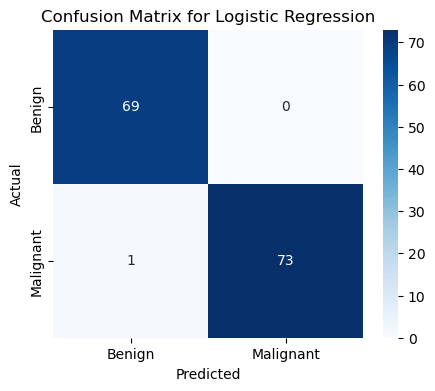

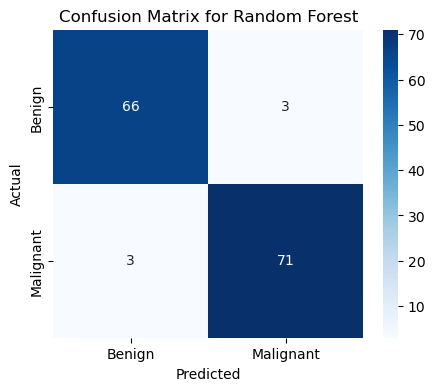

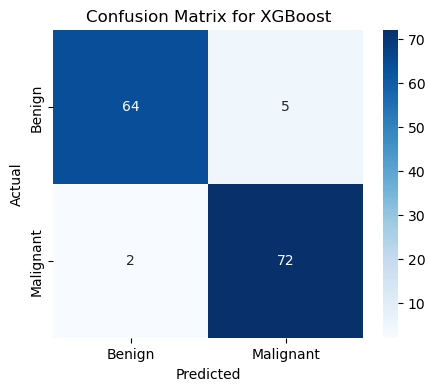

In [37]:
# Plot confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Features that have the most impact on model's prediction

To understand which features contribute the most to our model's predictions, we can analyze the feature importances generated by the trained model. This is a crucial step in interpreting the model and gaining insights into the underlying data.

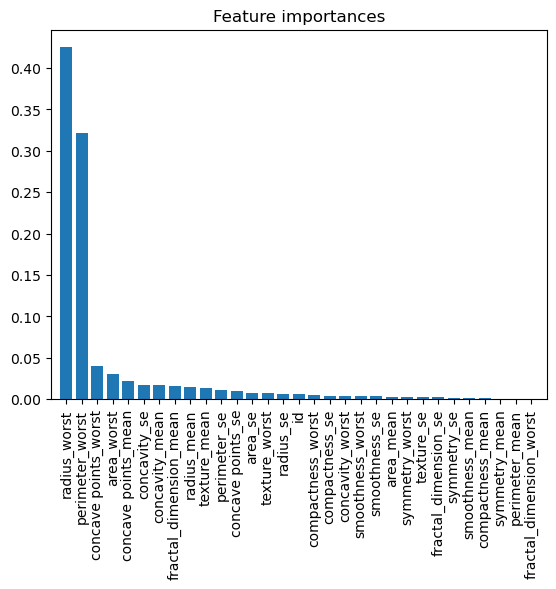

In [6]:
import numpy as np

importances = model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In this code:

* We first import the necessary libraries and extract the feature importances from the trained model using model.feature_importances_.
* The feature names are retrieved from the features DataFrame.
* We then sort the feature importances in descending order to prioritize the most significant features.
* 
Finally, we create a bar plot to visualize these importances, which helps us identify which features are most influential in predicting whether a tumor is benign or malignant. 
